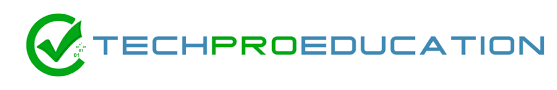

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>

## <span style=" color:red" id="determines">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    


## <span style=" color:Green" id="predata">Data Preprocessing

<div class="alert alert-warning alert-info" id="library">
<span style=" color:red">1. Import Libraries
</span>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import warnings ;
#warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info" id="dataset">
<span style=" color:red">2. Read Dataset
</span>

In [ ]:
df = pd.read_csv(r"C:\Users\EmincanY\Desktop\TecPro Group\store_sharing.csv")
df

<div class="alert alert-warning alert-info" id = "nan">
<span style=" color:red">3. Check missing values and if there are any duplicate rows or not.
</span>

In [ ]:
df.isnull().sum() # There is no any nan value.

In [ ]:
df.drop_duplicates() # There is no duplicate rows. No one dropped.

## <span style=" color:Green" id="feature">Feature Engineering

<div class="alert alert-warning alert-info">
<span style=" color:red">1. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df["timestamp"] = df.timestamp.astype("datetime64")  #df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M')  
df.dtypes

In [ ]:
df.set_index("timestamp" , inplace = True ) # We set new index with timestamp column.

<div class="alert alert-warning alert-info" >
<span style=" color:red" id="season">2. Add season_name Feature
</span>


In [ ]:
mapping = {0.0 : "Spring" , 1.0 : "Summer" , 2.0 : "Fall" , 3.0 : "Winter"}
df["season_name"] = df.season.map(mapping)


<div class="alert alert-warning alert-info" >
<span style=" color:red" id="columns">3. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [ ]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour

In [ ]:
df['dayofweek_num'] = df.index.dayofweek
df['dayofweek_name'] = df.index.day_name()
df["dayofmonth_num"] = df.index.strftime("%d")

## <span style=" color:Green" id="visulization">Data Visulization

<div class="alert alert-warning alert-info">
<span style=" color:red" id="weather">1. Weather Counts
</span>

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='weather_code',data=df);

<div class="alert alert-warning alert-info">
<span style=" color:red">1. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [ ]:

fig, ax = plt.subplots(2,2 , figsize = (25,15))


a = sns.histplot(ax = ax[0][0] , data = df , x = "is_holiday" )
a.set_title("Holiday or Not ?") # Değişkene atayım set yap.

b = sns.histplot(data = df , x = "season_name" , ax = ax[0][1] , hue = "weather_code" , palette="plasma")
b.set_xlabel("SEASONS")

#c = sns.histplot(x = df["is_weekend"] , ax = ax[1][0] , hue = df["weather_code"] )
c = sns.histplot( x = df["is_weekend"] , ax = ax[1][0])
d = sns.histplot(x = df["weather_code"] , ax = ax[1][1] , bins = 30 , hue = df["season_name"] );



<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [ ]:
df

In [ ]:
df.corr()

In [ ]:
from matplotlib.pyplot import annotate


plt.figure(figsize= (15,10))

sns.heatmap(df.corr() , annot = True);

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

In [ ]:
df.corr()

In [ ]:
df.corr()[df.corr() > 0.2]

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()[df.corr() > 0.2] , annot = True);

In [ ]:
df.cnt.index

In [ ]:
cnt_cor = df.corr()["cnt"].sort_values()
cnt_cor

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(x = df.corr().cnt.index , y = df.corr().cnt );

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

In [ ]:
df.head()

In [ ]:
df.index.year

In [ ]:
from turtle import color


plt.figure(figsize=(15,10));

sns.lineplot(x = df.index , y =df["cnt"]);

plt.xlabel("Year" , fontsize = 25 , color = "green");
plt.ylabel("CNT" , fontsize = 25 , color = "red");


<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [ ]:
df

In [ ]:
from matplotlib.pyplot import xlabel, ylabel


fig, ax = plt.subplots(2,3 , figsize = (20,14))

sns.lineplot( x = df["month"] , y = df["cnt"], ax = ax[0][0]);
sns.pointplot( x = df["month"] , y = df["cnt"], ax = ax[0][1]);
sns.barplot( x = df["month"] , y = df["cnt"], ax = ax[0][2]);
sns.pointplot( x = df["year"] , y = df["cnt"], ax = ax[1][0]);
sns.lineplot( x = df["month"] , y = df["cnt"] , hue = df["year"] , palette = "plasma" , ax = ax[1][1]);
sns.lineplot( x = df["year"] , y = df["cnt"], ax = ax[1][2]);

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(1,3 , figsize = (25,15))

sns.lineplot(x = df.hour , y = df.cnt , hue = df.season_name , ax = ax[0]);
sns.lineplot(x = df.hour , y = df.cnt , hue = df["is_weekend"] , ax = ax[1]);
sns.lineplot(x = df.hour , y = df.cnt , hue = df["is_holiday"] ,ax = ax[2]);

In [ ]:
#fig, ax = plt.subplots(1,3,figsize = (20,14))

#sns.lineplot( x = df["is_holiday"] , y = df["cnt"] , ax = ax[0]);
#sns.lineplot( x = df["is_weekend"] , y = df["cnt"] , ax = ax[1]);
#sns.lineplot( x = df["season_name"] , y = df["cnt"], ax = ax[2]); 

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

In [ ]:
df

In [ ]:
df.groupby("is_holiday")["cnt"].mean()

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (18,10))

sns.lineplot(x= df["dayofweek_name"] , y= df["cnt"] , hue = df["is_holiday"] , ax = ax[0]);
sns.barplot(x = "dayofweek_name" , y = "cnt" , data = df , hue = "is_holiday" , ax = ax[1]);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (18,12))

sns.barplot(x = df["dayofmonth_num"] , y = df.cnt, ax = ax[0] ) ;
sns.lineplot(x = df["dayofmonth_num"] , y = df["cnt"] , ax = ax[1]);


<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

In [ ]:
df[df["is_holiday"] == 1]

In [ ]:
from turtle import title


fig, ax = plt.subplots(1,3, figsize = (20,14))

sns.lineplot(x = df.year , y = df.cnt , ax = ax[0]) ;
sns.barplot(x = df[df["is_holiday"] == 1]["season_name"] , y = df[df["is_holiday"] == 1].cnt , ax = ax[1]) ;
plt.title("No Holiday")
sns.barplot(x = df[df["is_holiday"] == 0]["season_name"] , y = df[df["is_holiday"] == 0].cnt , ax = ax[2] ) ;


<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [ ]:
df.groupby("is_weekend").cnt.mean()

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20,12))

sns.barplot(x = df["is_weekend"] , y = df["cnt"] , ax = ax[0]);
plt.pie(x = df.groupby("is_weekend").cnt.mean(), labels = ["Weekday" , "Weekend"] , autopct= '%.2f' , textprops={'fontsize': 20}) ;


<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

In [ ]:
plt.figure(figsize=(20,14))
sns.barplot(x = df["season_name"] , y = df.weather_code ) ;

In [ ]:
# Additional

df.weather_code_mapped = df.weather_code.map({
    1:'Clear',
    2:'Few clouds',
    3:'Broken clouds',
    4:'Cloudy',
    7:'Light Rain shower',
    10:'Thunderstorm',
    26:'Snowfall',
    94:'Freezing Fog'
})

In [ ]:
# Additional

plt.figure(figsize=(20, 10))

sns.histplot(binwidth=0.5, x=df.season, hue=df.weather_code_mapped, data=df, stat="count", multiple="stack");


<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

##### There was totally clear data. No null and no duplicate rows.
##### Too many days weather is clear. Freezing Fog never happened. Snowfall sometimes happened. Rain with thunderstorms happened the least.
##### As we expect the spring and summer have too many clear days. In the fall and winter have got more Scattered and Broken clouds.
##### Bike shares have positive relations with Temperature, Feeling Temperature, Hour and Wind Speed.
##### Bike shares have negative relations with humidity, weather status and season.
##### As a normally too strong positive correlation between temperature and feeling temperature.
##### As a normally positive correlation between Temperature/Feeling Temperature and months.
##### As a normally , positive correlation between the hum and seasons. 
##### Humidity and weather status have positive realations.
##### Humidity and wind speed have negative realations.
##### Bike shares is declining but peaked in the summer of 2015
##### As a normally , In summers more bike shares happens.
##### In all seasons. Early 8-9a.m and 17-18p.m too many bikes shares.
##### In weekdays also same eary 8-9a.m and 17.18p.m.
##### But in the weekends too many bikes shares around at 14-15p.m and have normal distribution.
##### On a holiday, less bike is shared than normal.
##### In a normal day(not holiday) summer have too many bike shares. Winter have lest.
##### During the holidays, not happened any bike shares in Fall. (This is strange) Winter still lest. Summer and spring almost the same bike shares.
##### Seasons have normal weather status. Hard to beautiful ==> Winter>Fall>Spring>Summer

##### That's all.




<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

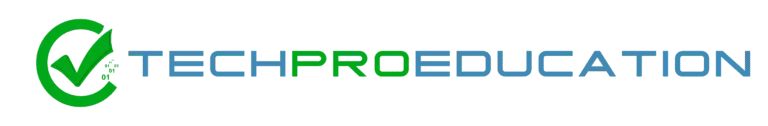